In [1]:
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).parent.parent.resolve())

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

from vinasmol.hfmodel import SMOLLM2
from vinasmol.tokenization.language import (
    token_language_classification,
    classification_model_name,
)

tokenizer_config.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

In [4]:
df = token_language_classification(SMOLLM2, batch_size=128)

Device set to use cuda:0


In [5]:
df

,token,cleaned,token_id,lang,score
0,ĠPrice,Price,17073,en-US,0.999723
1,Ġdancing,dancing,14452,en-US,0.613255
2,Ġdoorway,doorway,41644,ar-SA,0.467378
3,Ġrad,rad,1961,sl-SL,0.701456
4,Cho,Cho,29943,vi-VN,0.990256
...,...,...,...,...,...
49144,Ġarter,arter,11311,nb-NO,0.367269
49145,ĠEvaluating,Evaluating,32709,en-US,0.999894
49146,Ġacquaintance,acquaintance,41141,it-IT,0.999879
49147,ennial,ennial,19963,af-ZA,0.309494


In [6]:
threshold = 0.5
other_cat = f'other (< {threshold})'

In [13]:
confident_predictions = df[df['score'] > threshold]
training_languages = ['en-US']
confident_predictions.loc[~confident_predictions['lang'].isin(training_languages), 'lang'] = other_cat

In [14]:
lang_counts = confident_predictions['lang'].value_counts().to_frame().reset_index()
lang_counts

,lang,count
0,other (< 0.5),22327
1,en-US,14293


In [15]:
num_confident = len(confident_predictions)
num_other = lang_counts[lang_counts['lang'] == other_cat]['count'][0]
print(f"Vocabulary size: {len(df)}")
print(f"Tokens confidently classified (> {threshold}): {num_confident}")
print(f"Tokens confidently classified in training languages (> {threshold}): {num_confident - num_other}")

Vocabulary size: 49149
Tokens confidently classified (> 0.5): 36620
Tokens confidently classified in training languages (> 0.5): 14293


In [16]:
confident_predictions[confident_predictions['lang'] == other_cat]

,token,cleaned,token_id,lang,score
3,Ġrad,rad,1961,other (< 0.5),0.701456
4,Cho,Cho,29943,other (< 0.5),0.990256
10,Ġfolly,folly,48275,other (< 0.5),0.821337
12,Ġpropeller,propeller,38843,other (< 0.5),0.926065
13,ĠBoot,Boot,36747,other (< 0.5),0.732877
...,...,...,...,...,...
49137,Ġeffluent,effluent,41474,other (< 0.5),0.933620
49139,Ġmirror,mirror,11558,other (< 0.5),0.541811
49141,ocard,ocard,23661,other (< 0.5),0.511004
49143,Ġfixation,fixation,32784,other (< 0.5),0.969489


Text(0.5, 1.0, 'Token language distribution in SmolLM2')

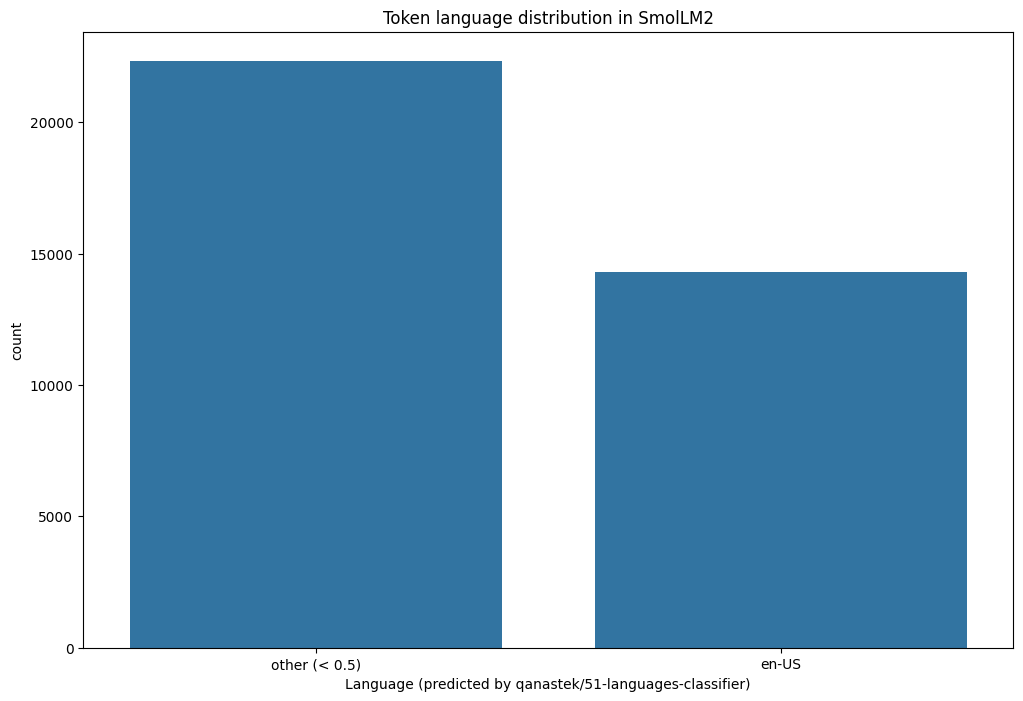

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(confident_predictions['lang'].value_counts())
plt.xlabel(f"Language (predicted by {classification_model_name})")
plt.title(f"Token language distribution in {SMOLLM2.friendly_name}")

Text(0.5, 1.0, 'Classifier score distribution')

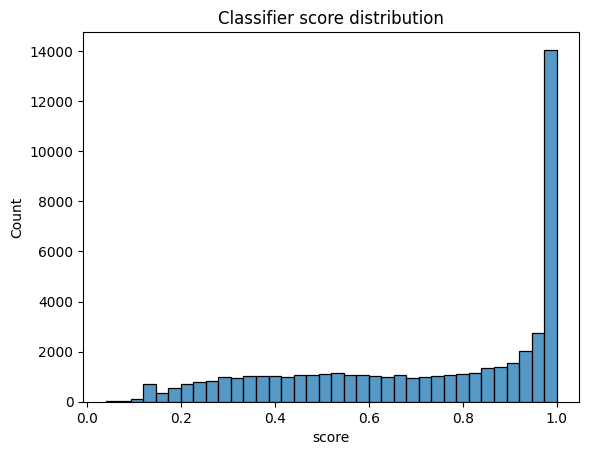

In [12]:
sns.histplot(df, x='score')
plt.title("Classifier score distribution")

In [3]:
tokenizer = SMOLLM2.load_tokenizer()
tokens = tokenizer.encode("Xin chào, bạn tên là gì?")
print([tokenizer.decode(token) for token in tokens])

['X', 'in', ' ch', 'à', 'o', ',', ' b', '�', '�', 'n', ' t', 'ê', 'n', ' l', 'à', ' g', 'ì', '?']
